In [1]:
# Some imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.special
from prettytable import PrettyTable

The Hamiltonian of the Cooper box is given by
$$
H = E_C \sum_N (N-N_g)^2 |N \rangle \langle N |
- 
\frac{1}{2}E_0 \sum_N
\big[
|N+1\rangle \langle N| +  |N-1\rangle \langle N|
\big]
$$
For simplicity, we set $E_C = 1$ and measure all energies relative to $E_C$. The following function calculates the eigenvalues of the Hamiltonian with $E_0 = 0$.


In [2]:
####################################################
# Return the energy eigenvalues of the unperturbed #
# Hamiltonian (the diagonal part)                  #
####################################################
def E0(N, Ng):
    return (N-Ng)**2



Now we plot the eigenvalues for different values of $N_g$. We plot three curves, corresponding to N=-1,0,1

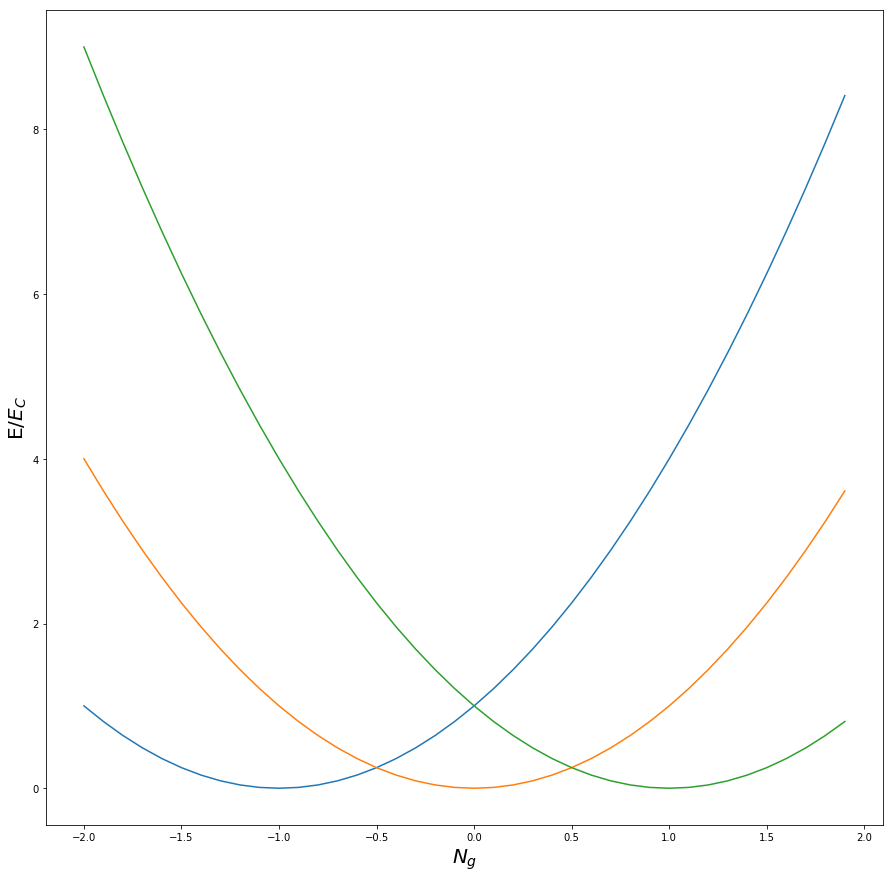

In [3]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(1,1,1)
R = np.arange(-2,2,0.1)
ax.plot(R,E0(-1,R))
ax.plot(R,E0(0,R))
ax.plot(R,E0(1,R))
ax.set_ylabel("E/$E_C$",fontsize=20)
ax.set_xlabel("$N_g$", fontsize=20)
plt.show()

We now study the behaviour for non-zero values of $E_0$. To do this, we approximate the Hamiltonian by the Hamiltonian on a finite subspace. This is a hermitian matrix for which we can find the eigenvalues using standard methods. More specifically, we introduce the parameter prec and restrict the Hamiltonian to the subspace of dimension $2*prec + 1$ spanned by the vectors $|n\rangle$ with $-prec \leq n \leq prec$.

In [4]:
#######################################################
# Return a finite part of the Hamiltonian             #
# prec = precision                                    #
# E0 = energy of Josephson junction                   #
# Ec = characteristic energy of capacitors            #
# Ng = gate voltage                                   #
#######################################################
def hamiltonian(Ec,E0,Ng,prec=10):
    H0 = Ec * np.diag((np.arange(-prec, prec+1)-Ng)**2, 0)
    V = -0.5*E0 * np.diag(np.ones(2*prec),1)   -0.5*E0 * np.diag(np.ones(2*prec),-1)
    return H0 + V

In [5]:
#######################################################
# Return an approximation of the n-th energy          #
# E0 = energy of Josephson junction                   #
# Ec = characteristic energy of capacitors            #
# Ng = gate voltage                                   #
#######################################################
def solve(Ec,E0,Ng,n, prec=10):
    H = hamiltonian(Ec, E0, Ng, prec)
    E, v = np.linalg.eig(H)
    s = np.argsort(E)
    return E[s[n]], v[:,s[n]], H


Now we again plot the first few eigenvalues

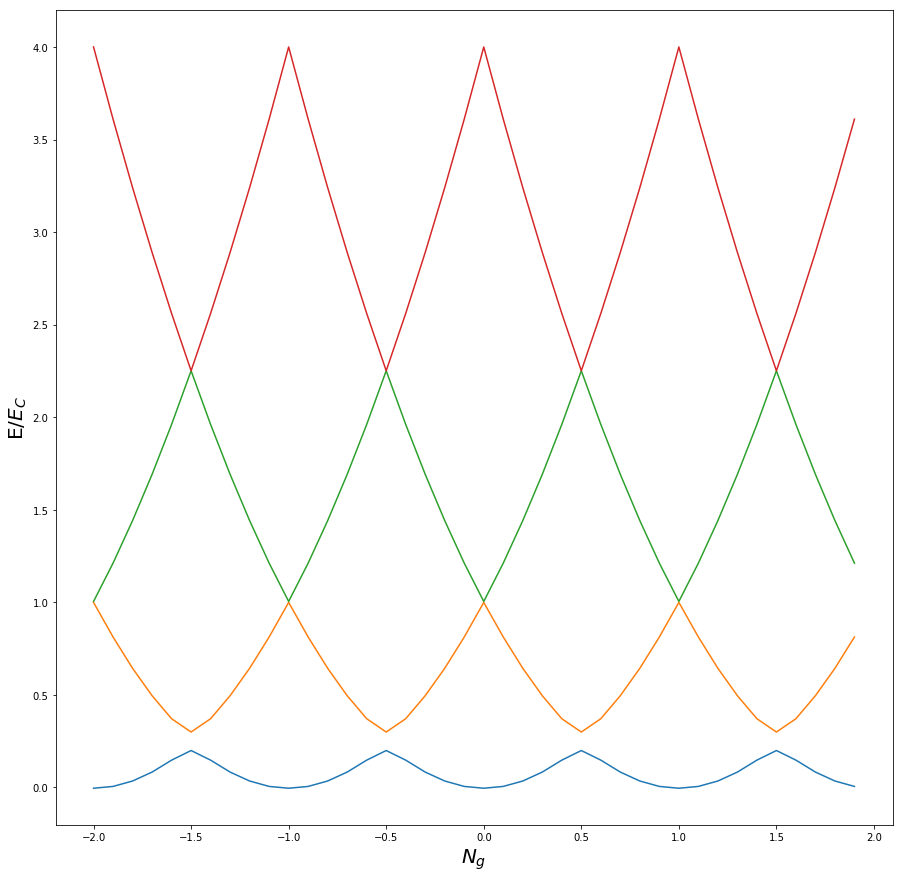

In [6]:
#########################################
# Plot the n-th eigenvalue depending on #
# the array R with Ng-values            #
#########################################
def plot(axis, E0, R,n, prec=10):
    y = []
    for r in R:
        E,_,_ = solve(1, E0, r, n, prec=prec)
        y.append(E)
    axis.plot(R,y)



fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(1,1,1)
E0 = 0.1
prec = 5
plot(ax, E0=E0, R=R, n=0, prec=prec)
plot(ax, E0=E0, R=R, n=1, prec=prec)
plot(ax, E0=E0, R=R, n=2, prec=prec)
plot(ax, E0=E0, R=R, n=3, prec=prec)
ax.set_ylabel("E/$E_C$",fontsize=20)
ax.set_xlabel("$N_g$", fontsize=20)


plt.show()

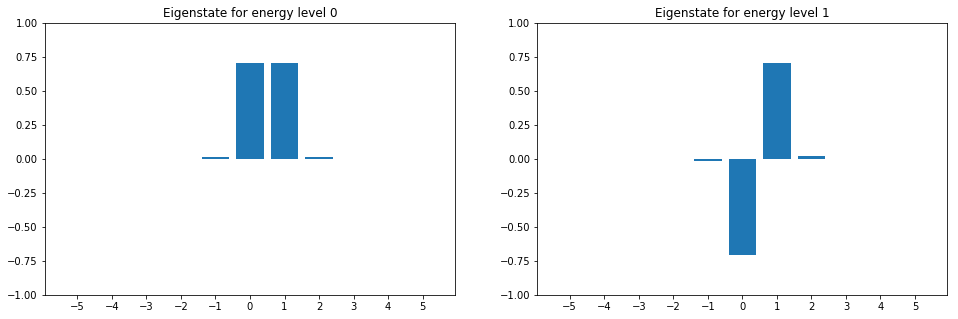

Hamiltonian: 
  30.25  -0.05   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
 -0.05  20.25  -0.05   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
  0.0   -0.05  12.25  -0.05   0.0    0.0    0.0    0.0    0.0    0.0    0.0  
  0.0    0.0   -0.05   6.25  -0.05   0.0    0.0    0.0    0.0    0.0    0.0  
  0.0    0.0    0.0   -0.05   2.25  -0.05   0.0    0.0    0.0    0.0    0.0  
  0.0    0.0    0.0    0.0   -0.05   0.25  -0.05   0.0    0.0    0.0    0.0  
  0.0    0.0    0.0    0.0    0.0   -0.05   0.25  -0.05   0.0    0.0    0.0  
  0.0    0.0    0.0    0.0    0.0    0.0   -0.05   2.25  -0.05   0.0    0.0  
  0.0    0.0    0.0    0.0    0.0    0.0    0.0   -0.05   6.25  -0.05   0.0  
  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   -0.05  12.25  -0.05 
  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   -0.05  20.25 


In [7]:
#####################################################
# Now plot the eigenstates in the N-representation  #
# at the point Ng                                   #
#####################################################
Ng = 0.5
fig = plt.figure(figsize=(25,5))
vectors = 2
for i in range(vectors):
    ax = fig.add_subplot(1,vectors+1,i+1)
    E,v,H = solve(1, E0=E0, Ng=Ng, n = i, prec=prec)
    v = v / np.linalg.norm(v)
    ax.bar(range(-prec,prec+1), v)
    ax.set_ylim(-1, 1)
    ax.set_xticks(range(-prec,prec+1))
    ax.set_title("Eigenstate for energy level "+str(i))


plt.show()
# And print the Hamiltonian used
p = PrettyTable()
for row in H:
    p.add_row(row)

print("Hamiltonian: \n", p.get_string(header=False, border=False))
